In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

## Threshold Segmentation


### 1-Simple Thresholding 

The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.<br>
The different Simple Thresholding Techniques are: 
 

cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
cv.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.

### 2-Otsu Thresholding 
In Otsu Thresholding:
* A value of the threshold isn’t chosen but is determined automatically.
* A bimodal image (two distinct image values) is considered.
* The histogram generated contains two peaks. So, a generic condition would be to choose a threshold value that lies in the middle of both the histogram peak values.

Syntax: cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)

Parameters:<br>
-> source: Input Image array (must be in Grayscale). <br>
-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. <br>
-> maxVal: Maximum value that can be assigned to a pixel. <br>
-> thresholdingTechnique: The type of thresholding to be applied.

### 3- Adaptive Thresholding
In Simple Thresholding, a global value of threshold was used which remained constant throughout.
<br>So, a constant threshold value won’t help in the case of variable lighting conditions in different areas. 
<br>Adaptive thresholding is the method where the threshold value is calculated for smaller regions.
<br>This leads to different threshold values for different regions with respect to the change in lighting.

In [2]:
img = cv2.imread('text.jpg',0)
 
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)   
thresh5 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
										cv2.THRESH_BINARY, 199, 5)

thresh6 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
										cv2.THRESH_BINARY, 199, 5)

cv2.imshow('Adaptive Mean', thresh1)
cv2.imshow('Adaptive Gaussian', thresh2)
cv2.imshow('Binary Threshold', thresh1)
cv2.imshow('Truncated Threshold', thresh2)
cv2.imshow('Set to 0', thresh3)
cv2.imshow('Otsu\'s threshold', thresh4)
cv2.imshow('Adaptive Mean', thresh5)
cv2.imshow('Adaptive Gaussian', thresh6)

cv2.waitKey(0) 


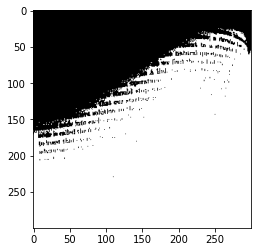

In [ ]:
gray = img
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

# K Means Clustering Algorithm

Clustering algorithms are unsupervised algorithms which means that there is no labelled data available. 
<br>It is used to identify different classes or clusters in the given data based on how similar the data is.
<br>Data points in the same group are more similar to other data points in that same group than those in other groups. 

**How does K-means clustering work –**

* Choose the number of clusters you want to find which is k.
* Randomly assign the data points to any of the k clusters.
* Then calculate the center of the clusters.
* Calculate the distance of the data points from the centers of each of the clusters.
* Depending on the distance of each data point from the cluster, reassign the data points to the nearest clusters.
* Again calculate the new cluster center.
* Repeat steps 4,5 and 6 till data points don’t change the clusters, or till we reach the assigned number of iterations.

OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.
### Parameters

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

   * cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
   * cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
   * cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.


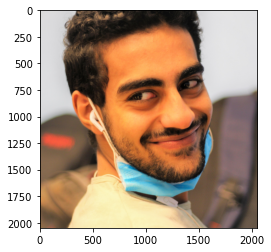

In [7]:
image = cv2.imread('EA.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

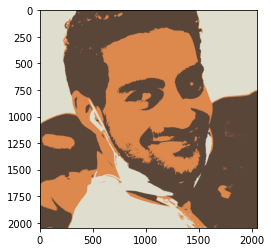

In [12]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 500, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

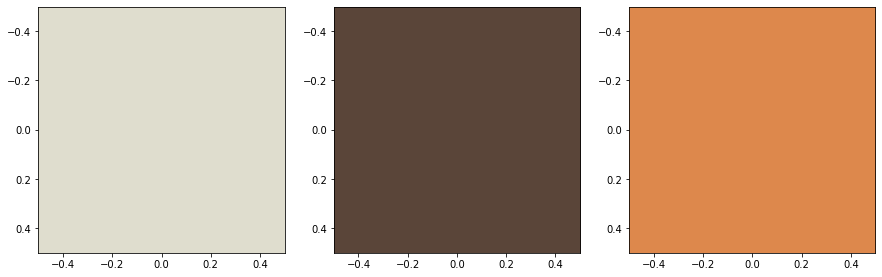

In [13]:
def show_colr(centers):
 fig,ax=plt.subplots(1,centers.shape[0], figsize=(15,10))
 for i in range(0,centers.shape[0]):
 
   ax[i].imshow([[centers[i]]])

   
show_colr(centers)

## Elbow Method to know best K

In [10]:
distortions = []
K=range(1,10)
for i in K:
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
    k = i
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    distortions.append(retval)
    

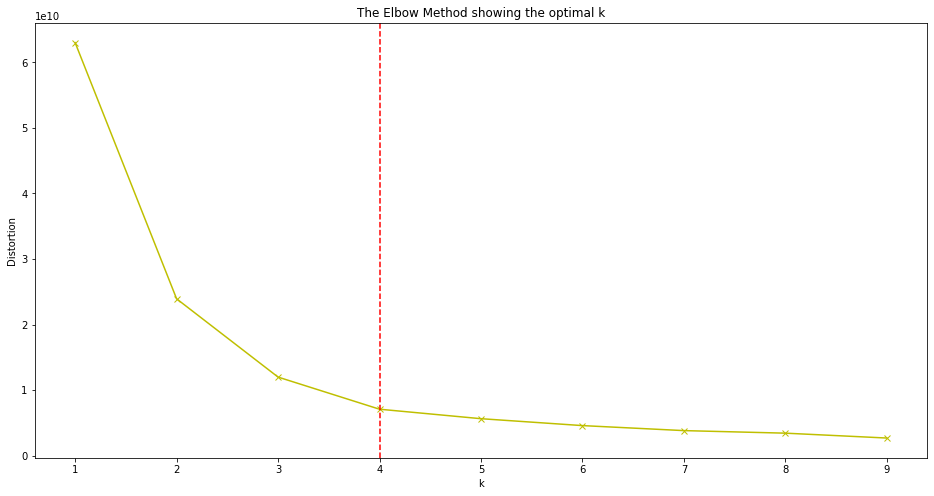

In [11]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, '-yx')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.axvline(x = 4, color = 'r', label = 'Best K',ls='--')
plt.show()